In [3]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.stats import linregress
from scipy.signal import argrelmax, argrelmin
from sklearn.metrics import r2_score
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import matplotlib.cm as cm
import mpltools.annotation as annotation
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap
from matplotlib.ticker import AutoMinorLocator
from matplotlib.legend_handler import HandlerTuple
from matplotlib.patches import PathPatch
from matplotlib.path import Path

In [4]:
plt.rcParams['font.family'] = 'Helvetica'

In [61]:
def gVV(params, tau):
    A1, A2, B, Gamma_t, Gamma_mix = params
    return A1 * np.exp(-(Gamma_mix) * tau) + A2 * np.exp(-Gamma_t * tau) + B

def residuals(params, tau, data):
    return np.sum((data - gVV(params, tau))**2)

average_gammas_VV = []
std_gammas_VV = []

#angles = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
angles = [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

base_paths_VV = [
   '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 1/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 2/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 3/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 4/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 5/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 6/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 7/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 8/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 9/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 10/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 11/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Measurement 12/'
]

for ang, base_path in zip(angles, base_paths_VV):
    fitted_params_VV = []

    for i in range(1, 4):
        file_path = f'{base_path}Repetition{i}/Correlation Function.csv'
        df = pd.read_csv(file_path, header=None, skiprows=[0, 1, 2])

        lagtime_var = f'lagtime_Aunrods_{ang}_{i}_VV'
        lagtime_ms_var = f'lagtime_Aunrods_{ang}_ms_{i}_VV'
        corrfx_var = f'corrfx_Aunrods_{ang}_{i}_VV'

        globals()[lagtime_var] = df.iloc[:, 0]
        globals()[lagtime_ms_var] = globals()[lagtime_var] * 1000
        globals()[corrfx_var] = df.iloc[:, 1]

        # Define initial parameters and bounds
        initial_params = [1, 1, 1, 1, 2]
        bounds = [(0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf)]

        # Define the constraint: Gamma_mix > Gamma_t
        cons = {'type': 'ineq', 'fun': lambda x: x[4] - x[3]}

        result = minimize(residuals, initial_params, args=(globals()[lagtime_ms_var], globals()[corrfx_var]), 
                          bounds=bounds, constraints=cons)

        fitted_params_VV.append(result.x)

    params_df_VV = pd.DataFrame(fitted_params_VV, columns=['A1', 'A2', 'B', 'Gamma_t', 'Gamma_mix'])

    average_gamma_VV = params_df_VV['Gamma_t'].mean()
    std_gamma_VV = params_df_VV['Gamma_t'].std()

    average_gammas_VV.append(average_gamma_VV)
    std_gammas_VV.append(std_gamma_VV)

    print(f"Fitted parameters for angle {ang}:")
    print(params_df_VV)
    print(f"Average Gamma_t at {ang} degrees: {average_gamma_VV:.2f} 1/ms\n")


Fitted parameters for angle 30:
         A1        A2         B    Gamma_t  Gamma_mix
0  0.386907  0.437011  0.068816  74.380113  79.690769
1  0.389171  0.431055  0.070382  73.930497  79.549336
2  0.387601  0.433960  0.068234  78.787350  84.635737
Average Gamma_t at 30 degrees: 75.70 1/ms

Fitted parameters for angle 40:
         A1        A2         B    Gamma_t  Gamma_mix
0  0.390751  0.445165  0.055734  73.522288  78.515523
1  0.390467  0.443655  0.054278  74.451472  79.636459
2  0.389571  0.443997  0.055163  73.358071  78.343452
Average Gamma_t at 40 degrees: 73.78 1/ms

Fitted parameters for angle 50:
         A1        A2         B    Gamma_t  Gamma_mix
0  0.390522  0.435666  0.043814  74.047283  79.180926
1  0.392528  0.434738  0.044493  76.372333  81.798858
2  0.391763  0.436275  0.046724  75.183867  80.462506
Average Gamma_t at 50 degrees: 75.20 1/ms

Fitted parameters for angle 60:
         A1        A2         B    Gamma_t  Gamma_mix
0  0.395471  0.447417  0.038202  76.37864

In [62]:
def gVH(tau, A3, BB, Gamma_mix):
    return A3 * np.exp(-(Gamma_mix) * tau) + BB

average_gammas_VH = []
std_gammas_VH = []

#angles = [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
base_paths_VH = [
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 1/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 2/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 3/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 4/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 5/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 6/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 7/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 8/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 9/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 10/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 11/',
    '/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Measurement 12/'
]

for ang, base_path in zip(angles, base_paths_VH):
    fitted_params_VH = []

    for i in range(1, 4):
        file_path = f'{base_path}Repetition{i}/Correlation Function.csv'
        df = pd.read_csv(file_path, header=None, skiprows=[0, 1, 2])

        lagtime_var = f'lagtime_Aunrods_{ang}_{i}_VH'
        lagtime_ms_var = f'lagtime_Aunrods_{ang}_ms_{i}_VH'
        corrfx_var = f'corrfx_Aunrods_{ang}_{i}_VH'

        globals()[lagtime_var] = df.iloc[:, 0]
        globals()[lagtime_ms_var] = globals()[lagtime_var] * 1000
        globals()[corrfx_var] = df.iloc[:, 1]
        
        popt, _ = curve_fit(gVH, globals()[lagtime_ms_var], globals()[corrfx_var], 
                            p0=[1, 1, 1], bounds=(0, np.inf))

        fitted_params_VH.append(popt)

    params_df_VH = pd.DataFrame(fitted_params_VH, columns=['A3', 'BB', 'Gamma_mix'])

    average_gamma_VH = params_df_VH['Gamma_mix'].mean()
    std_gamma_VH = params_df_VH['Gamma_mix'].std()

    average_gammas_VH.append(average_gamma_VH)
    std_gammas_VH.append(std_gamma_VH)

    print(f"Fitted parameters for angle {ang}:")
    print(params_df_VH)
    print(f"Average Gamma_mix at {ang} degrees: {average_gamma_VH:.2f} 1/ms\n")


Fitted parameters for angle 30:
         A3        BB   Gamma_mix
0  0.977900  0.000687  511.362424
1  0.973424  0.000987  507.717043
2  0.974379  0.001009  508.805708
Average Gamma_mix at 30 degrees: 509.30 1/ms

Fitted parameters for angle 40:
         A3        BB   Gamma_mix
0  0.957325  0.000498  515.919668
1  0.960668  0.001127  514.854747
2  0.956375  0.001109  516.243124
Average Gamma_mix at 40 degrees: 515.67 1/ms

Fitted parameters for angle 50:
         A3        BB   Gamma_mix
0  0.963150  0.001242  522.281131
1  0.961259  0.000907  519.285812
2  0.964056  0.001063  521.136752
Average Gamma_mix at 50 degrees: 520.90 1/ms

Fitted parameters for angle 60:
         A3        BB   Gamma_mix
0  0.965865  0.000671  523.574807
1  0.962431  0.000905  521.649812
2  0.968090  0.000977  524.746885
Average Gamma_mix at 60 degrees: 523.32 1/ms

Fitted parameters for angle 70:
         A3        BB   Gamma_mix
0  0.966941  0.001041  526.256653
1  0.967723  0.000750  524.684310
2  0.96461

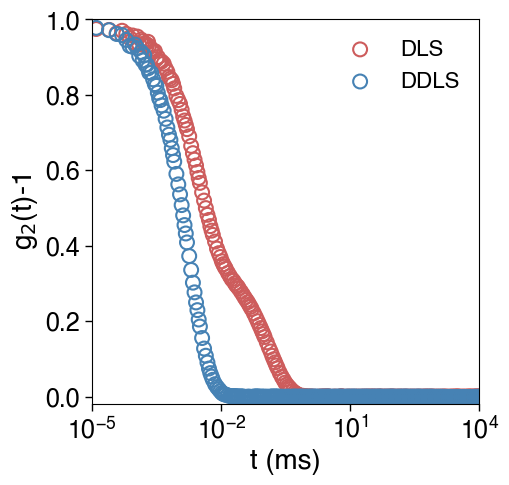

In [63]:
fig, ax = plt.subplots(figsize=(5, 5))

c_DLS = 'maroon'
c_l_DLS = 'indianred'
c_DDLS = 'navy'
c_l_DDLS = 'steelblue'

scatter1 = ax.scatter(lagtime_Aunrods_80_ms_2_VV, corrfx_Aunrods_80_2_VV, marker='o', facecolors=c_l_DLS, edgecolors=c_l_DLS, 
                          s=100, linewidths=1.5, label= 'DLS')
scatter1.set_facecolor('none') 
scatter2 = ax.scatter(lagtime_Aunrods_80_ms_2_VH, corrfx_Aunrods_80_2_VH, marker='o', facecolors=c_l_DDLS, edgecolors=c_l_DDLS, 
                          s=100, linewidths=1.5, label= 'DDLS')
scatter2.set_facecolor('none')

plt.xscale("log")
plt.xlabel('t (ms)', fontsize=20)
plt.ylabel('g$_2$(t)-1', fontsize=20)  
plt.legend(frameon=False, loc='best',fontsize=16)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
plt.xlim(1E-5, 1E4)
plt.ylim(-0.02, 1)
#plt.savefig("Correlation function VS lag time DLS vs DDLS at 80deg.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

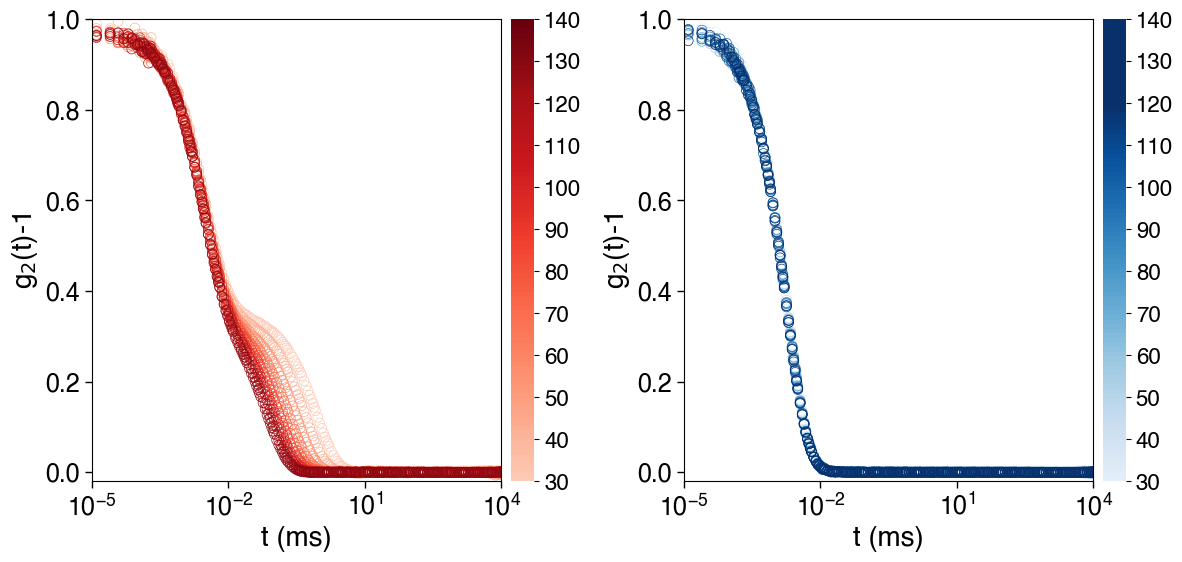

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

lagtime_VV = [lagtime_Aunrods_30_ms_2_VV, lagtime_Aunrods_40_ms_2_VV, lagtime_Aunrods_50_ms_2_VV, 
              lagtime_Aunrods_60_ms_2_VV, lagtime_Aunrods_70_ms_2_VV, lagtime_Aunrods_80_ms_2_VV, 
              lagtime_Aunrods_90_ms_2_VV, lagtime_Aunrods_100_ms_2_VV, lagtime_Aunrods_110_ms_2_VV, lagtime_Aunrods_120_ms_2_VV]
corrfx_VV = [corrfx_Aunrods_30_2_VV, corrfx_Aunrods_40_2_VV, corrfx_Aunrods_50_2_VV, 
             corrfx_Aunrods_60_2_VV, corrfx_Aunrods_70_2_VV, corrfx_Aunrods_80_2_VV, 
             corrfx_Aunrods_90_2_VV, corrfx_Aunrods_100_2_VV, corrfx_Aunrods_110_2_VV, corrfx_Aunrods_120_2_VV]


lagtime_VH = [lagtime_Aunrods_30_ms_2_VH, lagtime_Aunrods_40_ms_2_VH, lagtime_Aunrods_50_ms_2_VH, 
              lagtime_Aunrods_60_ms_2_VH, lagtime_Aunrods_70_ms_2_VH, lagtime_Aunrods_80_ms_2_VH, 
              lagtime_Aunrods_90_ms_2_VH, lagtime_Aunrods_100_ms_2_VH, lagtime_Aunrods_110_ms_2_VH, lagtime_Aunrods_120_ms_2_VH]
corrfx_VH = [corrfx_Aunrods_30_2_VH, corrfx_Aunrods_40_2_VH, corrfx_Aunrods_50_2_VH, 
             corrfx_Aunrods_60_2_VH, corrfx_Aunrods_70_2_VH, corrfx_Aunrods_80_2_VH, 
             corrfx_Aunrods_90_2_VH, corrfx_Aunrods_100_2_VH, corrfx_Aunrods_110_2_VH, corrfx_Aunrods_120_2_VH]


cmap_VV_0 = plt.get_cmap('Reds')
cmap_VV = ListedColormap(cmap_VV_0(np.linspace(0.2, 1.0, 100)))
cmap_VH_0 = plt.get_cmap('Blues')
cmap_VH = ListedColormap(cmap_VH_0(np.linspace(0.1, 1.2, 100)))

ax1 = axs[0]
for idx, (x, y, label) in enumerate(zip(lagtime_VV, corrfx_VV, angles)):
    c = cmap_VV(float(idx) / len(lagtime_VV))
    scatter1 = ax1.scatter(x, y,marker='o', facecolors=c, edgecolors=c, 
                          s=50, linewidths=0.5, label=label)
    scatter1.set_facecolor('none')
    
sm_VV = plt.cm.ScalarMappable(cmap=cmap_VV)
sm_VV.set_array([])
cbar_VV = plt.colorbar(sm_VV, ax=ax1, orientation='vertical', pad=0.02)
cbar_VV.outline.set_visible(False)

ticks = np.linspace(0, 1, len(angles))
tick_labels = angles
cbar_VV.set_ticks(ticks)
cbar_VV.set_ticklabels(tick_labels, fontsize=16)

ax2 = axs[1]
for idx, (x, y, label) in enumerate(zip(lagtime_VH, corrfx_VH, angles)):
    c = cmap_VH(float(idx) / len(lagtime_VH))
    scatter1 = ax2.scatter(x, y,marker='o', facecolors=c, edgecolors=c, 
                          s=50, linewidths=0.5, label=label)
    scatter1.set_facecolor('none')

sm_VH = plt.cm.ScalarMappable(cmap=cmap_VH)
sm_VH.set_array([])
cbar_VH = plt.colorbar(sm_VH, ax=ax2, orientation='vertical', pad=0.02)
cbar_VH.outline.set_visible(False)

ticks = np.linspace(0, 1, len(angles))
tick_labels = angles
cbar_VH.set_ticks(ticks)
cbar_VH.set_ticklabels(tick_labels, fontsize=16)

for ax in axs.flat:
    ax.set_xscale("log")
    ax.set_xlabel('t (ms)', fontsize=20)
    ax.set_ylabel('g$_2$(t)-1', fontsize=20)
    #ax.legend(frameon=False, loc='best', fontsize=16)
    ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
    ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
    ax.set_xlim(1E-5, 1E4)
    ax.set_ylim(-0.02, 1)
#plt.savefig("Correlation function VS lag time DLS vs DDLS.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

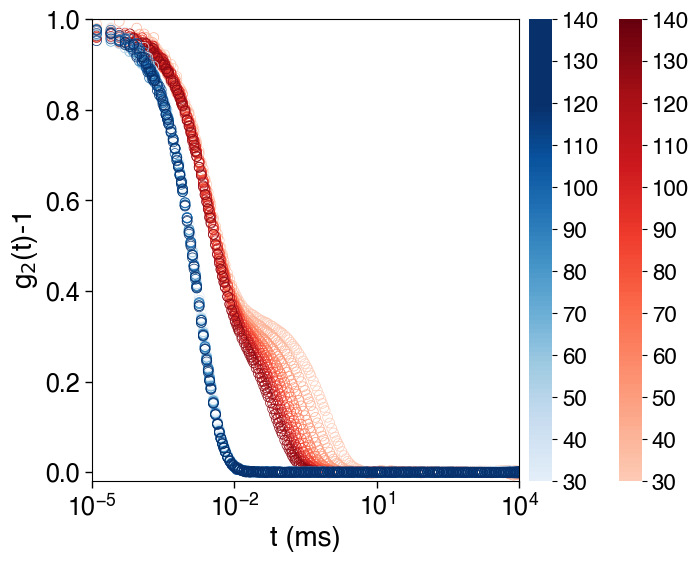

In [9]:
fig, axs = plt.subplots(figsize=(8, 6))

lagtime_VV = [lagtime_Aunrods_30_ms_2_VV, lagtime_Aunrods_40_ms_2_VV, lagtime_Aunrods_50_ms_2_VV, 
              lagtime_Aunrods_60_ms_2_VV, lagtime_Aunrods_70_ms_2_VV, lagtime_Aunrods_80_ms_2_VV, 
              lagtime_Aunrods_90_ms_2_VV, lagtime_Aunrods_100_ms_2_VV, lagtime_Aunrods_110_ms_2_VV, lagtime_Aunrods_120_ms_2_VV]
corrfx_VV = [corrfx_Aunrods_30_2_VV, corrfx_Aunrods_40_2_VV, corrfx_Aunrods_50_2_VV, 
             corrfx_Aunrods_60_2_VV, corrfx_Aunrods_70_2_VV, corrfx_Aunrods_80_2_VV, 
             corrfx_Aunrods_90_2_VV, corrfx_Aunrods_100_2_VV, corrfx_Aunrods_110_2_VV, corrfx_Aunrods_120_2_VV]


lagtime_VH = [lagtime_Aunrods_30_ms_2_VH, lagtime_Aunrods_40_ms_2_VH, lagtime_Aunrods_50_ms_2_VH, 
              lagtime_Aunrods_60_ms_2_VH, lagtime_Aunrods_70_ms_2_VH, lagtime_Aunrods_80_ms_2_VH, 
              lagtime_Aunrods_90_ms_2_VH, lagtime_Aunrods_100_ms_2_VH, lagtime_Aunrods_110_ms_2_VH, lagtime_Aunrods_120_ms_2_VH]
corrfx_VH = [corrfx_Aunrods_30_2_VH, corrfx_Aunrods_40_2_VH, corrfx_Aunrods_50_2_VH, 
             corrfx_Aunrods_60_2_VH, corrfx_Aunrods_70_2_VH, corrfx_Aunrods_80_2_VH, 
             corrfx_Aunrods_90_2_VH, corrfx_Aunrods_100_2_VH, corrfx_Aunrods_110_2_VH, corrfx_Aunrods_120_2_VH]


cmap_VV_0 = plt.get_cmap('Reds')
cmap_VV = ListedColormap(cmap_VV_0(np.linspace(0.2, 1.0, 100)))
cmap_VH_0 = plt.get_cmap('Blues')
cmap_VH = ListedColormap(cmap_VH_0(np.linspace(0.1, 1.2, 100)))

for idx, (x, y, label) in enumerate(zip(lagtime_VV, corrfx_VV, angles)):
    c = cmap_VV(float(idx) / len(lagtime_VV))
    scatter1 = axs.scatter(x, y,marker='o', facecolors=c, edgecolors=c, 
                          s=50, linewidths=0.5, label=label)
    scatter1.set_facecolor('none')
    
sm_VV = plt.cm.ScalarMappable(cmap=cmap_VV)
sm_VV.set_array([])
cbar_VV = plt.colorbar(sm_VV, ax=axs, orientation='vertical', pad=0.02)
cbar_VV.outline.set_visible(False)

ticks = np.linspace(0, 1, len(angles))
tick_labels = angles
cbar_VV.set_ticks(ticks)
cbar_VV.set_ticklabels(tick_labels, fontsize=16)

for idx, (x, y, label) in enumerate(zip(lagtime_VH, corrfx_VH, angles)):
    c = cmap_VH(float(idx) / len(lagtime_VH))
    scatter1 = axs.scatter(x, y,marker='o', facecolors=c, edgecolors=c, 
                          s=50, linewidths=0.5, label=label)
    scatter1.set_facecolor('none')

sm_VH = plt.cm.ScalarMappable(cmap=cmap_VH)
sm_VH.set_array([])
cbar_VH = plt.colorbar(sm_VH, ax=axs, orientation='vertical', pad=0.02)
cbar_VH.outline.set_visible(False)

ticks = np.linspace(0, 1, len(angles))
tick_labels = angles
cbar_VH.set_ticks(ticks)
cbar_VH.set_ticklabels(tick_labels, fontsize=16)

axs.set_xscale("log")
axs.set_xlabel('t (ms)', fontsize=20)
axs.set_ylabel('g$_2$(t)-1', fontsize=20)
#ax.legend(frameon=False, loc='best', fontsize=16)
axs.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
axs.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
axs.set_xlim(1E-5, 1E4)
axs.set_ylim(-0.02, 1)
#plt.savefig("Correlation function VS lag time DLS vs DDLS.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

General autocorrelation function:

$$
g(t) = exp(-\Gamma t)
$$

For anisotropic nanoparticles:

$$
g_{VV} (\tau) = A_1 exp(-(\Gamma_t+\Gamma_r)\tau)+A_2 exp(-\Gamma_t \tau) + B
$$

$$
g_{VH} (\tau) = A_3 exp(-(\Gamma_t+\Gamma_r)\tau) + B'
$$

Let

$$
\Gamma_{total} =\Gamma_t+\Gamma_r
$$

$$
g_{VV} (\tau) = A_1 exp(-\Gamma_{total} \tau)+A_2 exp(-\Gamma_t \tau) + B
$$

$$
g_{VH} (\tau) = A_3 exp(-\Gamma_{total} \tau) + B'
$$

$$
q = \frac{4\pi n}{\lambda}sin(\frac{\theta}{2})
$$

For anisotropic nanoparticles:

$$
G_{VV} (\tau) = A_1 exp(-(\Gamma_t+\Gamma_r))+A_2 exp(-\Gamma_t \tau) + B
$$

$$
G_{VH} (\tau) = A_3 exp(-(\Gamma_t+\Gamma_r)\tau) + B'
$$

$$
\Gamma_t = D_t q^2
$$

$$
\Gamma_r = 6D_r
$$

$$
\Gamma = \Gamma_t+\Gamma_r = q^2D_T+6D_R
$$
\
$D_T$ = Translational diffusion coefficient 
\
$D_R$ = Rotational diffusion coefficient 

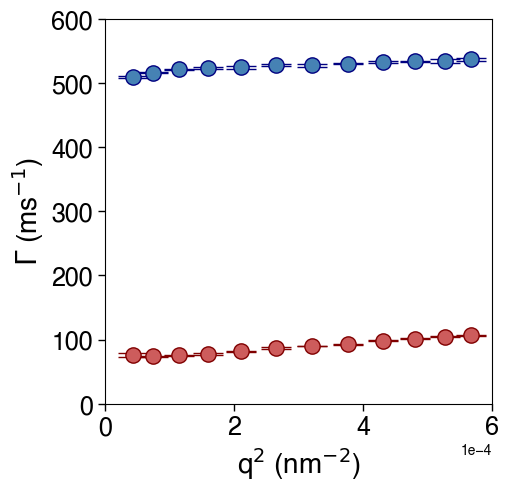

In [69]:
angle_rad = [np.deg2rad(x) for x in angles]
n = 1.33
lambd = 660 #nm

q = [(4*np.pi*n*np.sin(x/2))/(lambd) for x in angle_rad]
q2 = [x**2 for x in q]
q2_2 = ['{:.6f}'.format(x) for x in q2]

fig, ax = plt.subplots(figsize=(5, 5))
plt.errorbar(q2, average_gammas_VV, yerr=std_gammas_VV, fmt='o', markersize=11, capsize=11, linewidth=2, markerfacecolor=c_l_DLS, markeredgecolor=c_DLS, color=c_DLS)
plt.errorbar(q2, average_gammas_VH, yerr=std_gammas_VH, fmt='o', markersize=11, capsize=11, linewidth=2, markerfacecolor=c_l_DDLS, markeredgecolor=c_DDLS, color=c_DDLS)

plt.xlabel('q$^2$ (nm$^{-2}$)', fontsize=20)
plt.ylabel('$\Gamma$ (ms$^{-1}$)', fontsize=20)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
formatter = ScalarFormatter()
formatter.set_powerlimits((-4, -4))  
ax.xaxis.set_major_formatter(formatter)
plt.xlim(0, 6E-4)
plt.ylim(0, 600)
#plt.title('Average Gamma vs. q2', fontsize=20)
plt.show()

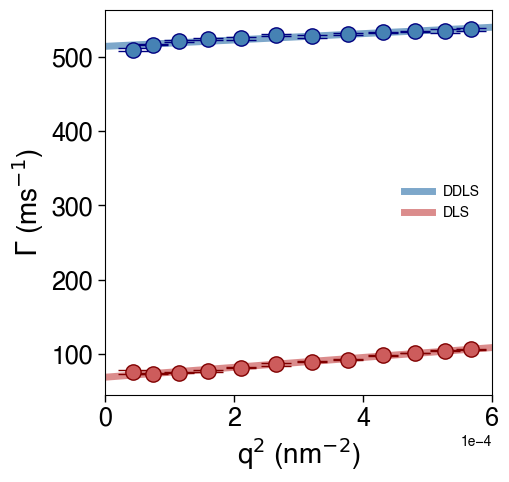

D_t from DLS (VV): 66502.34 nm^2/ms
D_t from DDLS (VH): 42844.46 nm^2/ms
D_r from DDLS (VH): 85.61 1/ms


In [70]:
def linear_fit_VV(q_sq, D_t_VV, B):
    return D_t_VV * q_sq + B

popt_VV, pcov_VV = curve_fit(linear_fit_VV, q2, average_gammas_VV)
D_t_VV = popt_VV[0]


def linear_fit_VH(q_sq, D_t_VH, D_r_VH):
    return D_t_VH * q_sq + 6 * D_r_VH 

popt_VH, pcov_VH = curve_fit(linear_fit_VH, q2, average_gammas_VH)
D_t_VH = popt_VH[0]
D_r_VH = popt_VH[1]

extrapolated_q2 = np.linspace(0, 0.0006, 100)
extrapolated_gammas_VV = linear_fit_VV(extrapolated_q2, *popt_VV)
extrapolated_gammas_VH = linear_fit_VH(extrapolated_q2, *popt_VH)

q2 = np.array(q2)
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(extrapolated_q2, extrapolated_gammas_VH, '-', linewidth=5, alpha=0.7, color=c_l_DDLS, label='DDLS')
plt.errorbar(q2, average_gammas_VH, yerr=std_gammas_VH, fmt='o', markersize=11, capsize=11, linewidth=5, markerfacecolor=c_l_DDLS, markeredgecolor=c_DDLS, color=c_DDLS)

#plt.plot(q2, linear_fit_VV(q2, *popt_VV), color=c_l_DLS, label='DLS')
plt.plot(extrapolated_q2, extrapolated_gammas_VV, '-', linewidth=5, alpha=0.7, color=c_l_DLS, label='DLS')
plt.errorbar(q2, average_gammas_VV, yerr=std_gammas_VV, fmt='o', markersize=11, capsize=11, linewidth=5, markerfacecolor=c_l_DLS, markeredgecolor=c_DLS, color=c_DLS, clip_on = False)

plt.xlabel('q$^2$ (nm$^{-2}$)', fontsize=20)
plt.ylabel('$\Gamma$ (ms$^{-1}$)', fontsize=20)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
formatter = ScalarFormatter()
formatter.set_powerlimits((-4, -4))  
ax.xaxis.set_major_formatter(formatter)
plt.xlim(0, 6E-4)
#plt.title('Average Gamma vs. q2', fontsize=20)
plt.legend(frameon = False)
plt.show()

print(f'D_t from DLS (VV): {D_t_VV:.2f} nm^2/ms')
print(f'D_t from DDLS (VH): {D_t_VH:.2f} nm^2/ms')
print(f'D_r from DDLS (VH): {D_r_VH:.2f} 1/ms')

For high aspect ratio rods with r<<L:

$$
\Gamma = q^2D_T+6D_R
$$
\
$D_T$ = Translational diffusion coefficient 

$$
D_T = \frac{k_B T }{6\pi \eta} \frac{ln(L/r)}{L}
$$
\
$D_R$ = Rotational diffusion coefficient 

$$
D_R = \frac{k_B T }{8\pi \eta} \frac{ln(L/r)}{L^3}
$$

$$
D_R = \frac{6}{8} {\frac{k_B T }{6\pi \eta} \frac{ln(L/r)}{L}} \frac{1}{L^2}
$$

$$
D_R = \frac{3}{4} D_T \frac{1}{L^2}
$$

$$
L^2 = \frac{3}{4} \frac{D_T}{D_R}
$$

$$
ln(L/r) = D_T \frac{6\pi \eta L}{k_B T}
$$

$$
\frac{L}{r} = exp(D_T \frac{6\pi \eta L}{k_B T})
$$

$$
r = \frac{L}{exp(D_T \frac{6\pi \eta L}{k_B T})}
$$

In [60]:
D_t = D_t_VV*1e-18/1e-3   #m^2/s
D_r = D_r_VH/1e-3         #1/s
eta = 0.9321e-3              #Pa*s
T_C = 23                  #C
T_K = T_C+273             #K
pi = np.pi
                          #1 Joule = 1 Pa.m3
kB = 1.38e-23             #J/K = Pa.m3/K
L = np.sqrt((3*D_t)/(4*D_r))
L_nm = L*1e9
print(f"L= {L_nm:.2f} nm")

#ln_L_r = (D_r * 8 * pi * eta * L**3) / (kB * T_K)
ln_L_r = (D_t * 6 * pi * eta * L) / (kB * T_K)
AR = np.exp(ln_L_r)
r = L / AR
r_nm = r*1e9
print(f"r= {r_nm:.2e} nm")

print(f"Aspect ratio: {AR:.2e}\n") 



L= 24.14 nm
r= 2.42e-02 nm
Aspect ratio: 9.97e+02



### Calculate the theoretical numbers for the diffusion coefficients

$$
D_T = \frac{k_B T}{6 \pi \eta r_p}
$$

$$
D_R = \frac{k_B T}{8 \pi \eta r_p^3}
$$

In [14]:
kB = 1.38e-23             #J/K = Pa.m3/K
T_C = 23                  #C
T_K = T_C+273             #K
pi = np.pi
eta = 0.9321e-3           #Pa.s
r_TEM = 13.1e-9      #m
l_TEM = 31.9e-9      #m

DT_theo = (kB*T_K)/(6*pi*eta*r_TEM) #(Pa.m3/K*K)/(Pa.s*m)
print(f"D_T = {DT_theo:.2e} m^2/s")
print(f"D_T = {DT_theo*1e15:.2f} nm^2/ms")

DR_theo = (kB*T_K)/(6*pi*eta*(r_TEM)**3) #(Pa.m3/K*K)/(Pa.s*m^3)
print(f'D_R = {DR_theo:.2e} 1/s')
print(f'D_R = {DR_theo*1e3:.2f} 1/ms')

D_T = 1.77e-11 m^2/s
D_T = 17747.45 nm^2/ms
D_R = 1.03e+05 1/s
D_R = 103417320.08 1/ms


In [15]:
kB = 1.38e-23             #J/K = Pa.m3/K
T_C = 23                  #C
T_K = T_C+273             #K
pi = np.pi
eta = 0.9321e-3           #Pa.s
r_TEM = 13.1e-9      #m
l_TEM = 31.9e-9      #m

DT_theo = (kB*T_K)/(6*pi*eta*l_TEM) #(Pa.m3/K*K)/(Pa.s*m)
print(f"D_T = {DT_theo:.2e} m^2/s")
print(f"D_T = {DT_theo*1e15:.2f} nm^2/ms")

DR_theo = (kB*T_K)/(6*pi*eta*(l_TEM)**3) #(Pa.m3/K*K)/(Pa.s*m^3)
print(f'D_R = {DR_theo:.2e} 1/s')
print(f'D_R = {DR_theo*1e3:.2f} 1/ms')

D_T = 7.29e-12 m^2/s
D_T = 7288.14 nm^2/ms
D_R = 7.16e+03 1/s
D_R = 7162013.20 1/ms


# Plotting differntly

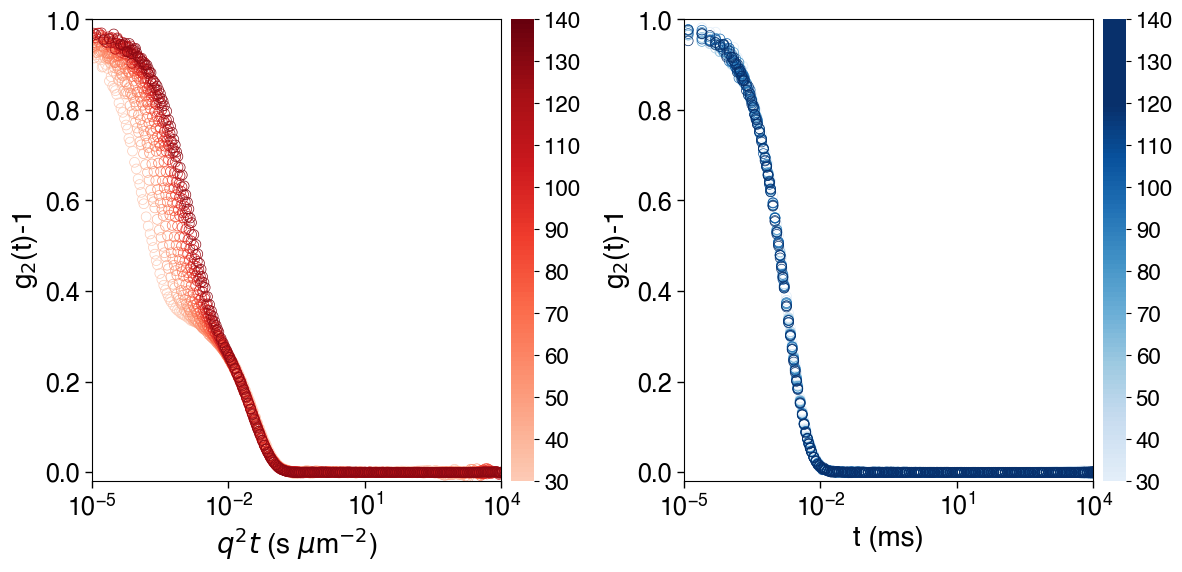

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

cmap_VV_0 = plt.get_cmap('Reds')
cmap_VV = ListedColormap(cmap_VV_0(np.linspace(0.2, 1.0, 100)))
cmap_VH_0 = plt.get_cmap('Blues')
cmap_VH = ListedColormap(cmap_VH_0(np.linspace(0.1, 1.2, 100)))

ax1 = axs[0]
for idx, (x, y, label, q2_val) in enumerate(zip(lagtime_VV, corrfx_VV, angles, q2)):
    x_new = x * q2_val * 1000  # Adjust x values
    c = cmap_VV(float(idx) / len(lagtime_VV))
    scatter1 = ax1.scatter(x_new, y,marker='o', facecolors=c, edgecolors=c, 
                          s=50, linewidths=0.5, label=label)
    scatter1.set_facecolor('none')

sm_VV = plt.cm.ScalarMappable(cmap=cmap_VV)
sm_VV.set_array([])
cbar_VV = plt.colorbar(sm_VV, ax=ax1, orientation='vertical', pad=0.02)
cbar_VV.outline.set_visible(False)

ticks = np.linspace(0, 1, len(angles))
tick_labels = angles
cbar_VV.set_ticks(ticks)
cbar_VV.set_ticklabels(tick_labels, fontsize=16)

ax2 = axs[1]
for idx, (x, y, label) in enumerate(zip(lagtime_VH, corrfx_VH, angles)):
    c = cmap_VH(float(idx) / len(lagtime_VH))
    scatter1 = ax2.scatter(x, y,marker='o', facecolors=c, edgecolors=c, 
                          s=50, linewidths=0.5, label=label)
    scatter1.set_facecolor('none')

sm_VH = plt.cm.ScalarMappable(cmap=cmap_VH)
sm_VH.set_array([])
cbar_VH = plt.colorbar(sm_VH, ax=ax2, orientation='vertical', pad=0.02)
cbar_VH.outline.set_visible(False)

ticks = np.linspace(0, 1, len(angles))
tick_labels = angles
cbar_VH.set_ticks(ticks)
cbar_VH.set_ticklabels(tick_labels, fontsize=16)

ax1.set_xlabel(r'$q^2 t$ (s $\mu$m$^{-2}$)', fontsize=20)
ax2.set_xlabel('t (ms)', fontsize=20)
ax2.set_xlim(1E-5, 1E4)
ax1.set_xlim(1E-5, 1E4)
for ax in axs.flat:
    ax.set_xscale("log")
    ax.set_ylabel('g$_2$(t)-1', fontsize=20)
    ax.tick_params(axis='y', length=5, width=1, color='black', direction='out', labelsize=18)
    ax.tick_params(axis='x', length=5, width=1, color='black', direction='out', labelsize=18)
    ax.set_ylim(-0.02, 1)
# plt.savefig("Correlation function VS lag time DLS vs DDLS.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()


# Find Rg

In [20]:
AuNRs_SLS = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VV/Au NRs_0.1OD.csv', header= None, skiprows=[0,1,2,3])

AuNRs_SLS_theta_angle = AuNRs_SLS.iloc[3:,13]
AuNRs_SLS_I_wave = AuNRs_SLS.iloc[3:,4]
AuNRs_SLS_theta = [float(theta) for theta in AuNRs_SLS_theta_angle]
AuNRs_SLS_theta_radian = np.deg2rad(AuNRs_SLS_theta)
AuNRs_SLS_I = [float(I) for I in AuNRs_SLS_I_wave]
AuNRs_SLS_lnI = [np.log(I) for I in AuNRs_SLS_I]

n = 1.33
lambd = 660 #nm

AuNRs_SLS_q = [(4*np.pi*n*np.sin(x/2))/(lambd) for x in AuNRs_SLS_theta_radian]
AuNRs_SLS_q2 = [q**2 for q in AuNRs_SLS_q]

AuNRs_SLS_DD = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20240717_DDLS on AuNRs/Au NRs_0.1OD_VH/Au NRs_0.1OD_VH.csv', header= None, skiprows=[0,1,2,3])

AuNRs_SLS_DD_theta_angle = AuNRs_SLS_DD.iloc[3:,13]
AuNRs_SLS_DD_I_wave = AuNRs_SLS_DD.iloc[3:,4]
AuNRs_SLS_DD_theta = [float(theta) for theta in AuNRs_SLS_DD_theta_angle]
AuNRs_SLS_DD_theta_radian = np.deg2rad(AuNRs_SLS_DD_theta)
AuNRs_SLS_DD_I = [float(I) for I in AuNRs_SLS_DD_I_wave]
AuNRs_SLS_DD_lnI = [np.log(I) for I in AuNRs_SLS_DD_I]

n = 1.33
lambd = 660 #nm

AuNRs_SLS_DD_q = [(4*np.pi*n*np.sin(x/2))/(lambd) for x in AuNRs_SLS_DD_theta_radian]
AuNRs_SLS_DD_q2 = [q**2 for q in AuNRs_SLS_DD_q]

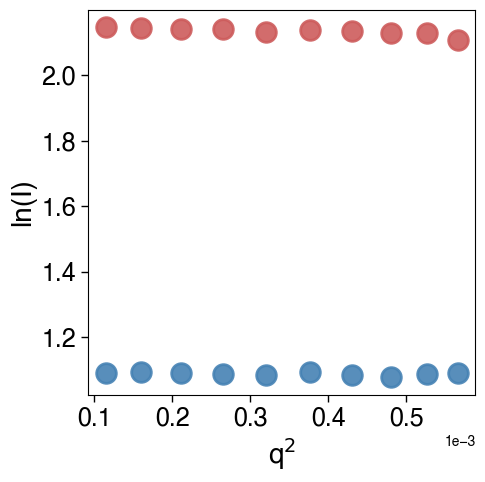

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
PS_scatter = ax.scatter(AuNRs_SLS_q2, AuNRs_SLS_lnI, s=200, alpha=0.9, marker='o', 
                        facecolors=c_l_DLS, edgecolors=c_l_DLS, linewidths=2, clip_on=False)
PS_scatter = ax.scatter(AuNRs_SLS_DD_q2, AuNRs_SLS_DD_lnI, s=200, alpha=0.9, marker='o', 
                        facecolors=c_l_DDLS, edgecolors=c_l_DDLS, linewidths=2, clip_on=False)


plt.xlabel('q$^2$', fontsize=20)
plt.ylabel('ln(I)', fontsize=20)  

formatter = ScalarFormatter()
formatter.set_powerlimits((-3, -3))  
ax.xaxis.set_major_formatter(formatter)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.ylim(3.85, 4.15)
#plt.xlim(0, 0.0006)
#plt.xscale("log")
#plt.yscale("log")
#plt.savefig("SLS SiO2.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

The chracteristis of objects are encoded in the low q scattering via radius of gyration calculated as the root mean square distance of the object's parts from its center of gravity.


Guinier Law (valid when $qR_g<1.3$):

$$
I(q→0)\sim I_0 exp(\frac{−q^2R_g^2}{3})
$$

Linearize it

$$
ln⁡(𝐼(𝑞)) ≈ −\frac{𝑞^2 𝑅_𝑔^2}{3}+ln(⁡𝐼(0))
$$

Or
$$
𝑃(𝑞)≃1−\frac{(𝑞𝑅_𝑔 )^2}{3}
$$

Note: the Guinier region of the scattering data would not be linear if sample contains aggregation
    

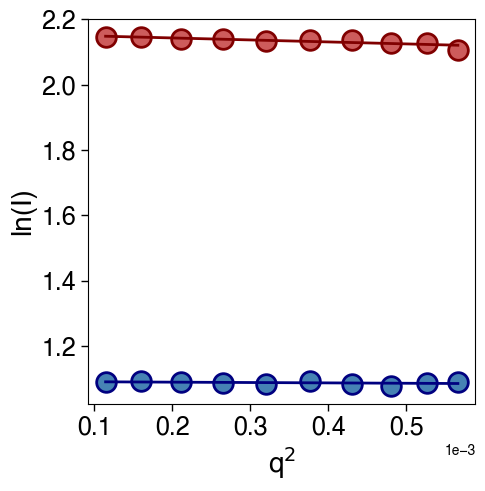

Fitted Parameters:
Slope:, -60.90
Intercept:, 2.15
R2 = 0.7319
Slope:, -11.35
Intercept:, 1.09
R2 = 0.1344


In [66]:
def linear_equation(x, m, c):
    return m * x + c

popt_AuNRs_SLS, pcov_AuNRs_SLS = curve_fit(linear_equation, AuNRs_SLS_q2, AuNRs_SLS_lnI)

slope_AuNRs_SLS, intercept_AuNRs_SLS = popt_AuNRs_SLS

x_AuNRs_SLS = np.linspace(min(AuNRs_SLS_q2), max(AuNRs_SLS_q2), 100)
y_AuNRs_SLS = slope_AuNRs_SLS * x_AuNRs_SLS + intercept_AuNRs_SLS

AuNRs_SLS_q2 = np.array(AuNRs_SLS_q2)

y_pred_AuNRs_SLS = linear_equation(AuNRs_SLS_q2, slope_AuNRs_SLS, intercept_AuNRs_SLS)

r_squared_AuNRs_SLS = r2_score(AuNRs_SLS_lnI, y_pred_AuNRs_SLS[:len(AuNRs_SLS_lnI)])

fig, ax = plt.subplots(figsize=(5, 5))

PS_scatter = ax.scatter(AuNRs_SLS_q2, AuNRs_SLS_lnI, s=200, alpha=1, marker='o', 
                        facecolors=c_l_DLS, edgecolors='maroon', linewidths=2, clip_on=False)
#PS_scatter.set_facecolor('none')

ax.plot(x_AuNRs_SLS, y_AuNRs_SLS, color='maroon', linestyle='-', linewidth=2)

popt_AuNRs_SLS_DD, pcov_AuNRs_SLS_DD = curve_fit(linear_equation, AuNRs_SLS_DD_q2, AuNRs_SLS_DD_lnI)

slope_AuNRs_SLS_DD, intercept_AuNRs_SLS_DD = popt_AuNRs_SLS_DD

x_AuNRs_SLS_DD = np.linspace(min(AuNRs_SLS_DD_q2), max(AuNRs_SLS_DD_q2), 100)
y_AuNRs_SLS_DD = slope_AuNRs_SLS_DD * x_AuNRs_SLS_DD + intercept_AuNRs_SLS_DD

AuNRs_SLS_DD_q2 = np.array(AuNRs_SLS_DD_q2)

y_pred_AuNRs_SLS_DD = linear_equation(AuNRs_SLS_DD_q2, slope_AuNRs_SLS_DD, intercept_AuNRs_SLS_DD)

r_squared_AuNRs_SLS_DD = r2_score(AuNRs_SLS_DD_lnI, y_pred_AuNRs_SLS_DD[:len(AuNRs_SLS_DD_lnI)])


PS_scatter = ax.scatter(AuNRs_SLS_DD_q2, AuNRs_SLS_DD_lnI, s=200, alpha=1, marker='o', 
                        facecolors=c_l_DDLS, edgecolors='navy', linewidths=2, clip_on=False)
#PS_scatter.set_facecolor('none')

ax.plot(x_AuNRs_SLS_DD, y_AuNRs_SLS_DD, color='navy', linestyle='-', linewidth=2)

plt.xlabel('q$^2$', fontsize=20)
plt.ylabel('ln(I)', fontsize=20)  

formatter = ScalarFormatter()
formatter.set_powerlimits((-3, -3))  
ax.xaxis.set_major_formatter(formatter)

plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.ylim(3.85, 4.15)
#plt.xlim(0, 0.0006)
#plt.text(0.3e-3, 2.12, f"Slope: {slope_AuNRs_SLS:.1f}\ny-intercept: {intercept_AuNRs_SLS:.1f}\nR$^2$ = {r_squared_AuNRs_SLS:.2f}",
#         fontsize=14, c='red')
#plt.savefig("SLS SiO2 fit.png", dpi=1500, bbox_inches='tight', transparent=True)
plt.show()

print("Fitted Parameters:")
print(f"Slope:, {slope_AuNRs_SLS:.2f}\nIntercept:, {intercept_AuNRs_SLS:.2f}\nR2 = {r_squared_AuNRs_SLS:.4f}")
print(f"Slope:, {slope_AuNRs_SLS_DD:.2f}\nIntercept:, {intercept_AuNRs_SLS_DD:.2f}\nR2 = {r_squared_AuNRs_SLS_DD:.4f}")



In [48]:
AuNRs_SLS_Rg = np.sqrt(-slope_AuNRs_SLS * 3)

print(f"AuNRs Rg: {AuNRs_SLS_Rg:.2f} nm")

R_AuNRs_SLS = np.sqrt(5/3*AuNRs_SLS_Rg**2)
D_AuNRs_SLS = 2*R_AuNRs_SLS
print(f"R: {R_AuNRs_SLS:.2f} nm")
print(f"D: {D_AuNRs_SLS:.2f} nm")

AuNRs_SLS_DD_Rg = np.sqrt(-slope_AuNRs_SLS_DD * 3)

print(f"AuNRs Rg: {AuNRs_SLS_DD_Rg:.2f} nm")

R_AuNRs_SLS_DD = np.sqrt(5/3*AuNRs_SLS_DD_Rg**2)
D_AuNRs_SLS_DD = 2*R_AuNRs_SLS_DD
print(f"R: {R_AuNRs_SLS_DD:.2f} nm")
print(f"D: {D_AuNRs_SLS_DD:.2f} nm")

AuNRs Rg: 13.52 nm
R: 17.45 nm
D: 34.90 nm
AuNRs Rg: 5.84 nm
R: 7.53 nm
D: 15.07 nm
